##  Project Stage - II Task 1 : Generate weekly statistics (mean, median, mode) for number of new cases and deaths across a specific state.

In [354]:
# Import libraries needed to plot graphs and perform statistical analysis.

import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from IPython.display import Image
confirmed_cases = pd.read_csv('../../../../data/stage_2/covid_confirmed_usafacts.csv')
death_cases = pd.read_csv('../../../../data/stage_2/covid_deaths_usafacts.csv')
population_ds = pd.read_csv('../../../../data/stage_2/covid_county_population_usafacts.csv')
population_df = pd.DataFrame(population_ds)
super_dataset = pd.read_csv('../../../../data/stage_1/superdataset.csv')

import warnings
warnings.filterwarnings('ignore')

## Calculate weekly statistics for new cases in Florida state

In [320]:
# Filter Data for Florida state

fl_data = confirmed_cases[confirmed_cases["State"] == "FL"]
fl_data = fl_data[fl_data['County Name'] != 'Statewide Unallocated']
fl_data.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
330,12001,Alachua County,FL,12,0,0,0,0,0,0,...,62121,62121,62121,62121,62121,62121,64444,64444,64444,64444
331,12003,Baker County,FL,12,0,0,0,0,0,0,...,7942,7942,7942,7942,7942,7942,8272,8272,8272,8272
332,12005,Bay County,FL,12,0,0,0,0,0,0,...,42327,42327,42327,42327,42327,42327,43866,43866,43866,43866
333,12007,Bradford County,FL,12,0,0,0,0,0,0,...,6868,6868,6868,6868,6868,6868,7142,7142,7142,7142
334,12009,Brevard County,FL,12,0,0,0,0,0,0,...,122479,122479,122479,122479,122479,122479,126687,126687,126687,126687


In [321]:
# Resetting the index to columns to avoid aggregation

refined_data = fl_data.set_index(['countyFIPS','County Name','State','StateFIPS'])
refined_data.head()

,,,,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
countyFIPS,County Name,State,StateFIPS,,,,,,,,,,,,,,,,,,,,,
12001,Alachua County,FL,12,0,0,0,0,0,0,0,0,0,0,...,62121,62121,62121,62121,62121,62121,64444,64444,64444,64444
12003,Baker County,FL,12,0,0,0,0,0,0,0,0,0,0,...,7942,7942,7942,7942,7942,7942,8272,8272,8272,8272
12005,Bay County,FL,12,0,0,0,0,0,0,0,0,0,0,...,42327,42327,42327,42327,42327,42327,43866,43866,43866,43866
12007,Bradford County,FL,12,0,0,0,0,0,0,0,0,0,0,...,6868,6868,6868,6868,6868,6868,7142,7142,7142,7142
12009,Brevard County,FL,12,0,0,0,0,0,0,0,0,0,0,...,122479,122479,122479,122479,122479,122479,126687,126687,126687,126687


## Calculating number of cases per day

In [322]:
# sum up the column values to get the total number of cases for the particular day 
# calculate difference to get new cases per day

covid_cases_summed = refined_data.sum()
new_covid_dataframe = pd.DataFrame(columns=refined_data.columns)
new_covid_dataframe = new_covid_dataframe.append(covid_cases_summed, ignore_index=True)
new_covid_dataframe

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
0,0,0,0,0,0,0,0,0,0,0,...,5478670,5478670,5478670,5478670,5478670,5478670,5610368,5610368,5610368,5610368


In [323]:
#Drop the first date as we we are using .diff, we will get the first value as NAN 

new_covid_dataframe = new_covid_dataframe.diff(axis=1)
new_covid_dataframe = new_covid_dataframe.drop(['2020-01-22'], axis=1)
new_covid_dataframe

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,131698,0,0,0


## Create function to calculate weekly mean

In [324]:
import math
number_of_weeks = math.floor(len(new_covid_dataframe.columns)/7)
def calculate_mean_median_mode(dataset,action):
    weekly_data = []
    i=0
    counter=7
    x=0
    while (x<number_of_weeks):
        if(action=="sum"):
            batch = dataset.iloc[:,i:counter].sum(axis=1).astype(int)
        i = i+7
        counter = counter+7
        x = x+1
        weekly_data.append(batch)
    return weekly_data

In [325]:
# Calculate mean for weekly data 

IS_SUM = "sum"
sum_data = calculate_mean_median_mode(new_covid_dataframe,IS_SUM)
sum_cases_weekly = pd.concat(sum_data, axis=1)
sum_cases_weekly

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0,0,0,0,0,1,30,297,1647,5581,...,8578,10977,12984,28841,124864,302176,396565,429312,288638,197768


## Mean number of new cases reported in Florida every week

In [326]:
weekly_avg_data = sum_cases_weekly.mean(axis=1).astype(int)[0]
weekly_avg_data

51685

## Median for weekly new cases reported in Florida every week 

In [327]:
median_week = sum_cases_weekly.median(axis=1).astype(int)[0]
median_week

28405

## Mode for weekly new cases reported in Florida every week

In [328]:
round(sum_cases_weekly.mode(axis=1)).astype(int)[0][0]

0

## Covid 19 Death case analysis for Florida state

In [329]:
#Filter the data for State Florida (FL) and Remove data where County Name is not allocated

fl_data_death = death_cases[death_cases["State"] == "FL"]
fl_data_death = fl_data_death[fl_data_death['County Name'] != 'Statewide Unallocated']
fl_data_death.head()

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
330,12001,Alachua County,FL,12,0,0,0,0,0,0,...,285,285,285,285,285,285,285,285,285,285
331,12003,Baker County,FL,12,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,62
332,12005,Bay County,FL,12,0,0,0,0,0,0,...,394,394,394,394,394,394,394,394,394,394
333,12007,Bradford County,FL,12,0,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,58
334,12009,Brevard County,FL,12,0,0,0,0,0,0,...,914,914,914,914,914,914,914,914,914,914


In [330]:
# Resetting the index to columns to avoid aggregation

refined_data_death = fl_data_death.set_index(['countyFIPS','County Name','State','StateFIPS'])
refined_data_death.head()

,,,,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
countyFIPS,County Name,State,StateFIPS,,,,,,,,,,,,,,,,,,,,,
12001,Alachua County,FL,12,0,0,0,0,0,0,0,0,0,0,...,285,285,285,285,285,285,285,285,285,285
12003,Baker County,FL,12,0,0,0,0,0,0,0,0,0,0,...,62,62,62,62,62,62,62,62,62,62
12005,Bay County,FL,12,0,0,0,0,0,0,0,0,0,0,...,394,394,394,394,394,394,394,394,394,394
12007,Bradford County,FL,12,0,0,0,0,0,0,0,0,0,0,...,58,58,58,58,58,58,58,58,58,58
12009,Brevard County,FL,12,0,0,0,0,0,0,0,0,0,0,...,914,914,914,914,914,914,914,914,914,914


In [331]:
# sum up the column values to get the total number of cases for the particular day and calculate difference to get new cases per day
covid_death_summed = refined_data_death.sum()
death_df = pd.DataFrame(columns=refined_data_death.columns)
death_df = death_df.append(covid_death_summed, ignore_index=True)
# Finding new cases everyday
death_df = death_df.diff(axis=1)
#dropping Nan value
death_df =death_df.drop(['2020-01-22'], axis=1)
death_df

,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,...,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [332]:
# Calculate mean for weekly data using predefined function calculate_mean_median_mode()

sum_data_death = calculate_mean_median_mode(death_df,IS_SUM)
death_weekly = pd.concat(sum_data_death, axis=1)
death_weekly

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,0,0,0,0,0,0,2,5,16,74,...,0,0,0,0,0,0,0,0,0,0


## Mean number of death cases reported in Florida every week

In [333]:
round(death_weekly.mean(axis=1)).astype(int)[0]

349

## Median number of death cases reported in Florida every week

In [334]:
round(death_weekly.median(axis=1)).astype(int)[0]

273

## Mode number of death cases reported in Florida every week

In [335]:
round(death_weekly.mode(axis=1)).astype(int)[0][0]

0

## Member Task 2 : Compare the data against other states for new and death cases. (normalize by population per 100,000)

## Identify the trend for new COVID cases in FL and compare against 5 states (NC,WV,VT,VA,MI)

In [336]:
#Filter data for comparing states FL with NC,WV,VT,VA,MI

covid_merged_subset = super_dataset[super_dataset["State"].isin(['FL','NC','WV','VT','VA','MI'])]
covid_merged_subset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
237864,0,statewide unallocated,FL,2020-01-22,0,0,0
237865,0,statewide unallocated,FL,2020-01-23,0,0,0
237866,0,statewide unallocated,FL,2020-01-24,0,0,0
237867,0,statewide unallocated,FL,2020-01-25,0,0,0
237868,0,statewide unallocated,FL,2020-01-26,0,0,0


In [337]:
#Calculate new cases and deaths for selected states by using diff() function
covid_merged_subset['new cases'] = covid_merged_subset['Confirmed'].diff()
covid_merged_subset['num deaths'] = covid_merged_subset['Deaths'].diff()
covid_merged_subset

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths
237864,0,statewide unallocated,FL,2020-01-22,0,0,0,NaN,NaN
237865,0,statewide unallocated,FL,2020-01-23,0,0,0,0.0,0.0
237866,0,statewide unallocated,FL,2020-01-24,0,0,0,0.0,0.0
237867,0,statewide unallocated,FL,2020-01-25,0,0,0,0.0,0.0
237868,0,statewide unallocated,FL,2020-01-26,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2273915,54109,wyoming county,WV,2022-02-03,6190,85,20394,38.0,1.0
2273916,54109,wyoming county,WV,2022-02-04,6246,85,20394,56.0,0.0
2273917,54109,wyoming county,WV,2022-02-05,6246,85,20394,0.0,0.0
2273918,54109,wyoming county,WV,2022-02-06,6246,85,20394,0.0,0.0


In [338]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

covid_merged_subset= covid_merged_subset[covid_merged_subset['Date'] != '2020-01-22']
covid_merged_subset['Date'] = covid_merged_subset.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
covid_merged_subset

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths
237865,0,statewide unallocated,FL,2020-01-23,0,0,0,0.0,0.0
237866,0,statewide unallocated,FL,2020-01-24,0,0,0,0.0,0.0
237867,0,statewide unallocated,FL,2020-01-25,0,0,0,0.0,0.0
237868,0,statewide unallocated,FL,2020-01-26,0,0,0,0.0,0.0
237869,0,statewide unallocated,FL,2020-01-27,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2273915,54109,wyoming county,WV,2022-02-03,6190,85,20394,38.0,1.0
2273916,54109,wyoming county,WV,2022-02-04,6246,85,20394,56.0,0.0
2273917,54109,wyoming county,WV,2022-02-05,6246,85,20394,0.0,0.0
2273918,54109,wyoming county,WV,2022-02-06,6246,85,20394,0.0,0.0


## Daily new and death cases normalized by population (per 100,000 persons)

In [339]:
# use groupby date and State and sum the new cases and deaths across State 
other_states_data_groupedByState = covid_merged_subset.groupby(["State","Date"]).sum().reset_index()
other_states_data_groupedByState

,State,Date,countyFIPS,Confirmed,Deaths,population,new cases,num deaths
0,FL,2020-01-23,808550,0,0,21477737,0.0,0.0
1,FL,2020-01-24,808550,0,0,21477737,0.0,0.0
2,FL,2020-01-25,808550,0,0,21477737,0.0,0.0
3,FL,2020-01-26,808550,0,0,21477737,0.0,0.0
4,FL,2020-01-27,808550,0,0,21477737,0.0,0.0
...,...,...,...,...,...,...,...,...
4477,WV,2022-02-03,2973025,455201,5829,1792147,3291.0,15.0
4478,WV,2022-02-04,2973025,458112,5846,1792147,2911.0,17.0
4479,WV,2022-02-05,2973025,458112,5846,1792147,0.0,0.0
4480,WV,2022-02-06,2973025,458112,5846,1792147,0.0,0.0


In [340]:
#Normalize the cases by population(per 1000000) and round the values to nearest integer
other_states_data_groupedByState['Normalized New Cases'] = round((other_states_data_groupedByState['new cases']/other_states_data_groupedByState['population'])*1000000).astype(int)
other_states_data_groupedByState['Normalized Death Cases'] = round((other_states_data_groupedByState['num deaths']/other_states_data_groupedByState['population'])*1000000).astype(int)
other_states_data_groupedByState

,State,Date,countyFIPS,Confirmed,Deaths,population,new cases,num deaths,Normalized New Cases,Normalized Death Cases
0,FL,2020-01-23,808550,0,0,21477737,0.0,0.0,0,0
1,FL,2020-01-24,808550,0,0,21477737,0.0,0.0,0,0
2,FL,2020-01-25,808550,0,0,21477737,0.0,0.0,0,0
3,FL,2020-01-26,808550,0,0,21477737,0.0,0.0,0,0
4,FL,2020-01-27,808550,0,0,21477737,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
4477,WV,2022-02-03,2973025,455201,5829,1792147,3291.0,15.0,1836,8
4478,WV,2022-02-04,2973025,458112,5846,1792147,2911.0,17.0,1624,9
4479,WV,2022-02-05,2973025,458112,5846,1792147,0.0,0.0,0,0
4480,WV,2022-02-06,2973025,458112,5846,1792147,0.0,0.0,0,0


### Calculate the Weekly number of cases and deaths for each state

In [341]:
#Group By date to aggregate data across week for selected states

other_states_weekly_data = other_states_data_groupedByState.groupby(["State", pd.Grouper(key='Date', freq='w')])['Normalized New Cases','Normalized Death Cases'].agg({'Normalized New Cases':'mean',
                                                                                                'Normalized Death Cases' :'mean'}).reset_index()
other_states_weekly_data

,State,Date,Normalized New Cases,Normalized Death Cases
0,FL,2020-01-26,0.000000,0.000000
1,FL,2020-02-02,0.000000,0.000000
2,FL,2020-02-09,0.000000,0.000000
3,FL,2020-02-16,0.000000,0.000000
4,FL,2020-02-23,0.000000,0.000000
...,...,...,...,...
643,WV,2022-01-16,2076.142857,7.428571
644,WV,2022-01-23,2343.285714,7.571429
645,WV,2022-01-30,2531.571429,10.714286
646,WV,2022-02-06,1532.142857,8.000000


## Plot grap for number of New Cases per 100000 person across states 

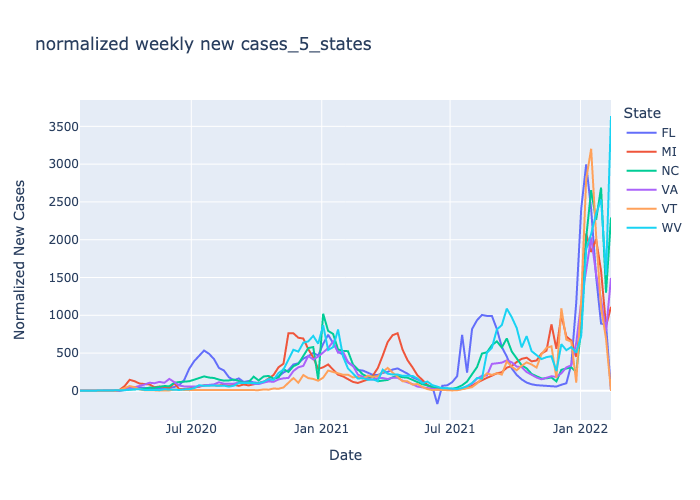

In [342]:
#Plot grap for number of new cases per 100000 across states 

fig1 = px.line(other_states_weekly_data, x="Date", y="Normalized New Cases", color="State",
              line_group="State", hover_name="State", title ='normalized weekly new cases_5_states')
#display plot
fig1.write_image("graphs/normalized weekly cases_5_States.png")
Image(filename="graphs/normalized weekly cases_5_States.png")
#fig1.show()

## Plot grap for number of Death Cases per 100000 person across states 

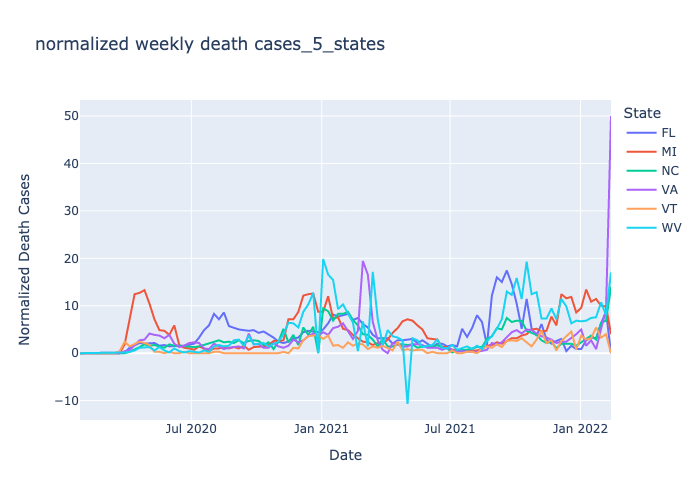

In [343]:
#Plot grap for number of new cases per 100000 across states 

fig2 = px.line(other_states_weekly_data, x="Date", y="Normalized Death Cases", color="State",
              line_group="State", hover_name="State", title ='normalized weekly death cases_5_states')
#display plot
fig2.write_image("graphs/normalized weekly death cases_5_States.png")
Image(filename="graphs/normalized weekly death cases_5_States.png")
#fig.show()

## Explain why the rate differ across these states. Identify the peaks and do they compare US pattern

* The rate differ across states based on population. The new and death cases show spikes in January 2021 and then October 2021 and finally January 2022.

* Virginia state has highest peak covid deaths in January 2022.

* West Virginia has lowest death cases in May 2021.

* West Virginia also has highest normalized confirmed cases in January 2022

* The data for these five states is comparable to US data as we also see spikes in confirmed and death cases in US for January 2021 and then October 2021 and finally January 2022.

## Stage 2 - Task 3: Identify five counties within a state of your choice with high cases and death rates.

## Chosen state is Florida(FL) for covid new case analysis

In [372]:
#Filter data for comparing counties in Florida and filter counties which are unallocated

fl_state_rates = super_dataset[super_dataset['State'] == "FL"]
fl_state_rates = fl_state_rates[fl_state_rates['County_Name'] != 'statewide unallocated']
fl_state_rates

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population
238612,12001,alachua county,FL,2020-01-22,0,0,269043
238613,12001,alachua county,FL,2020-01-23,0,0,269043
238614,12001,alachua county,FL,2020-01-24,0,0,269043
238615,12001,alachua county,FL,2020-01-25,0,0,269043
238616,12001,alachua county,FL,2020-01-26,0,0,269043
...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473
288724,12133,washington county,FL,2022-02-04,6463,52,25473
288725,12133,washington county,FL,2022-02-05,6463,52,25473
288726,12133,washington county,FL,2022-02-06,6463,52,25473


In [373]:
#Calculate new cases and deaths for selected states by using diff() function
fl_state_rates['new cases'] = fl_state_rates['Confirmed'].diff()
fl_state_rates['num deaths'] = fl_state_rates['Deaths'].diff()
fl_state_rates

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths
238612,12001,alachua county,FL,2020-01-22,0,0,269043,NaN,NaN
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0
...,...,...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473,0.0,0.0
288724,12133,washington county,FL,2022-02-04,6463,52,25473,202.0,0.0
288725,12133,washington county,FL,2022-02-05,6463,52,25473,0.0,0.0
288726,12133,washington county,FL,2022-02-06,6463,52,25473,0.0,0.0


In [374]:
# Remove first row as we have got NaN value for the diff() function. Conver date to correct format for further analysis.

fl_state_rates= fl_state_rates[fl_state_rates['Date'] != '2020-01-22']
fl_state_rates['Date'] = fl_state_rates.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
fl_state_rates

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0
238617,12001,alachua county,FL,2020-01-27,0,0,269043,0.0,0.0
...,...,...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473,0.0,0.0
288724,12133,washington county,FL,2022-02-04,6463,52,25473,202.0,0.0
288725,12133,washington county,FL,2022-02-05,6463,52,25473,0.0,0.0
288726,12133,washington county,FL,2022-02-06,6463,52,25473,0.0,0.0


## Daily new and death cases raw values

In [375]:
# use groupby date and County and sum the new cases and deaths across State 
# use sort function to get the highest number of cases in counties of Florida

fl_state_rates_groupedByCounties = fl_state_rates.groupby(["County_Name"]).sum().reset_index()
fl_state_rates_groupedByCounties = fl_state_rates_groupedByCounties.sort_values(by =['new cases'], ascending=False)
fl_counties_subset =  fl_state_rates_groupedByCounties.head()
fl_counties_subset

,County_Name,countyFIPS,Confirmed,Deaths,population,new cases,num deaths
42,miami-dade county,9028242,267660984,3049531,2029554180,1137694.0,6472.0
5,broward county,8972217,133719273,1409555,1458725166,581106.0,3079.0
47,orange county,9034965,80073845,581926,1040908644,358961.0,1310.0
27,hillsborough county,9006579,81672748,814651,1099560096,355347.0,1832.0
49,palm beach county,9037953,82345694,1366225,1118087190,353799.0,2883.0


## Counties in Florida with high infection rates
* Miami-dade County 
* Broward County
* Orange County
* Hillsborough County
* Palm beach County

### Calculate weekly new cases and number of deaths due to COVID in above counties

In [376]:
#Group By date to aggregate data across week for top 5 counties
fl_selected_counties = fl_state_rates[fl_state_rates['County_Name'].isin(['miami-dade county','broward county','orange county','hillsborough county','palm beach county'])]
other_counties_weekly_data = fl_selected_counties.groupby(["County_Name", pd.Grouper(key='Date', freq='w')])['new cases','num deaths'].agg({'new cases':'mean',
                                                                                                'num deaths' :'mean'}).reset_index()
other_counties_weekly_data

,County_Name,Date,new cases,num deaths
0,broward county,2020-01-26,0.000000,0.0
1,broward county,2020-02-02,0.000000,0.0
2,broward county,2020-02-09,0.000000,0.0
3,broward county,2020-02-16,0.000000,0.0
4,broward county,2020-02-23,0.000000,0.0
...,...,...,...,...
535,palm beach county,2022-01-16,3838.000000,0.0
536,palm beach county,2022-01-23,2153.571429,0.0
537,palm beach county,2022-01-30,1244.428571,0.0
538,palm beach county,2022-02-06,822.571429,0.0


In [377]:
# use groupby date and County and sum the new cases and deaths across State 
fl_state_rates_groupedByCounties = other_counties_weekly_data.groupby(["County_Name","Date"]).sum().reset_index()
fl_state_rates_groupedByCounties

,County_Name,Date,new cases,num deaths
0,broward county,2020-01-26,0.000000,0.0
1,broward county,2020-02-02,0.000000,0.0
2,broward county,2020-02-09,0.000000,0.0
3,broward county,2020-02-16,0.000000,0.0
4,broward county,2020-02-23,0.000000,0.0
...,...,...,...,...
535,palm beach county,2022-01-16,3838.000000,0.0
536,palm beach county,2022-01-23,2153.571429,0.0
537,palm beach county,2022-01-30,1244.428571,0.0
538,palm beach county,2022-02-06,822.571429,0.0


## Plot graph to get weekly trends of new cases with raw data across 5 counties

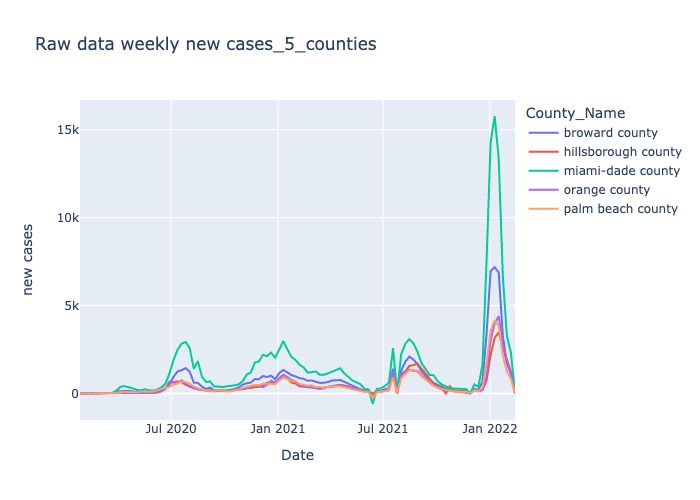

In [378]:
#Plot grap for number of new cases for raw data across counties 

fig = px.line(fl_state_rates_groupedByCounties, x="Date", y="new cases", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Raw data weekly new cases_5_counties')
#display plot
fig.write_image("graphs/normalized weekly raw data cases_5_Counties.png")
Image(filename="graphs/normalized weekly raw data cases_5_Counties.png")
#fig.show()

## Plot graph to get weekly trends of Death cases with raw data across 5 counties

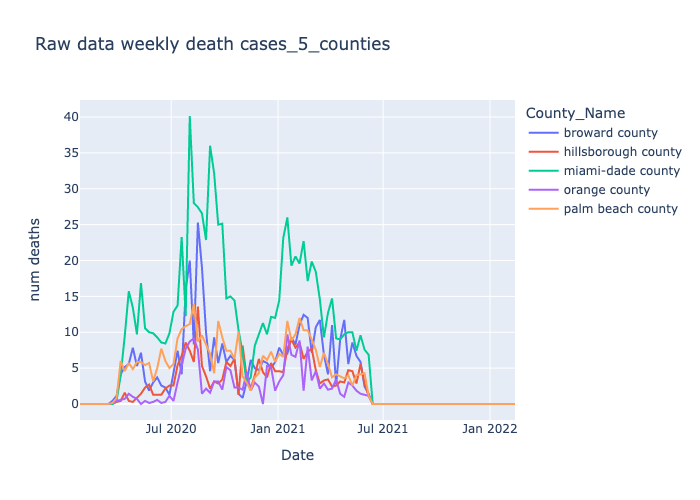

In [379]:
#Plot grap for number of new cases for raw data across counties 

fig = px.line(fl_state_rates_groupedByCounties, x="Date", y="num deaths", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Raw data weekly death cases_5_counties')
#display plot
fig.write_image("graphs/normalized weekly raw data death_cases_5_Counties.png")
Image(filename="graphs/normalized weekly raw data death_cases_5_Counties.png")
#fig.show()

## Daily new and death cases based on Log Normalized values (per 100,000 person) for 5 counties

In [386]:
fl_state_rates_normalized = fl_state_rates

#normalize the total number of cases and deaths of each county by dividing it by total population and multiply by 100000
fl_state_rates_normalized['new_cases_normalized'] = (fl_state_rates_normalized['new cases']/fl_state_rates_normalized['population'])*100000
fl_state_rates_normalized['num_deaths_normalized'] = (fl_state_rates_normalized['num deaths']/fl_state_rates_normalized['population'])*100000
fl_state_rates_normalized


,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths,new_cases_normalized,num_deaths_normalized,lognormal_cases,lognormal_deaths
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0,0.000000,0.0,-inf,-inf
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0,0.000000,0.0,-inf,-inf
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0,0.000000,0.0,-inf,-inf
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0,0.000000,0.0,-inf,-inf
238617,12001,alachua county,FL,2020-01-27,0,0,269043,0.0,0.0,0.000000,0.0,-inf,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288723,12133,washington county,FL,2022-02-03,6261,52,25473,0.0,0.0,0.000000,0.0,-inf,-inf
288724,12133,washington county,FL,2022-02-04,6463,52,25473,202.0,0.0,792.996506,0.0,2.899271,-inf
288725,12133,washington county,FL,2022-02-05,6463,52,25473,0.0,0.0,0.000000,0.0,-inf,-inf
288726,12133,washington county,FL,2022-02-06,6463,52,25473,0.0,0.0,0.000000,0.0,-inf,-inf


In [387]:
#log normalized values (base 10 log). Use numpy library to calculate log to base 10
fl_state_rates_normalized['lognormal_cases'] = np.log10(fl_state_rates_normalized.new_cases_normalized)
fl_state_rates_normalized['lognormal_deaths'] = np.log10(fl_state_rates_normalized.num_deaths_normalized)
fl_state_rates_normalized.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,new cases,num deaths,new_cases_normalized,num_deaths_normalized,lognormal_cases,lognormal_deaths
238613,12001,alachua county,FL,2020-01-23,0,0,269043,0.0,0.0,0.0,0.0,-inf,-inf
238614,12001,alachua county,FL,2020-01-24,0,0,269043,0.0,0.0,0.0,0.0,-inf,-inf
238615,12001,alachua county,FL,2020-01-25,0,0,269043,0.0,0.0,0.0,0.0,-inf,-inf
238616,12001,alachua county,FL,2020-01-26,0,0,269043,0.0,0.0,0.0,0.0,-inf,-inf
238617,12001,alachua county,FL,2020-01-27,0,0,269043,0.0,0.0,0.0,0.0,-inf,-inf


In [388]:
#Filter for top 5 infected counties in Florida

fl_state_rates_subset = fl_state_rates_normalized[fl_state_rates_normalized['County_Name'].isin(['miami-dade county','broward county','orange county','hillsborough county','palm beach county'])]
fl_state_rates_subset = fl_state_rates_subset.groupby(["County_Name", pd.Grouper(key='Date', freq='w')])['lognormal_cases','lognormal_deaths'].agg({'lognormal_cases':'mean',
                                                                                                'lognormal_deaths' :'mean'}).reset_index()
fl_state_rates_subset

,County_Name,Date,lognormal_cases,lognormal_deaths
0,broward county,2020-01-26,NaN,NaN
1,broward county,2020-02-02,NaN,NaN
2,broward county,2020-02-09,NaN,NaN
3,broward county,2020-02-16,NaN,NaN
4,broward county,2020-02-23,NaN,NaN
...,...,...,...,...
535,palm beach county,2022-01-16,NaN,NaN
536,palm beach county,2022-01-23,NaN,NaN
537,palm beach county,2022-01-30,NaN,NaN
538,palm beach county,2022-02-06,NaN,NaN


## Plot graph to get weekly trends of new cases with Log Normalized data (per 100,000 person)

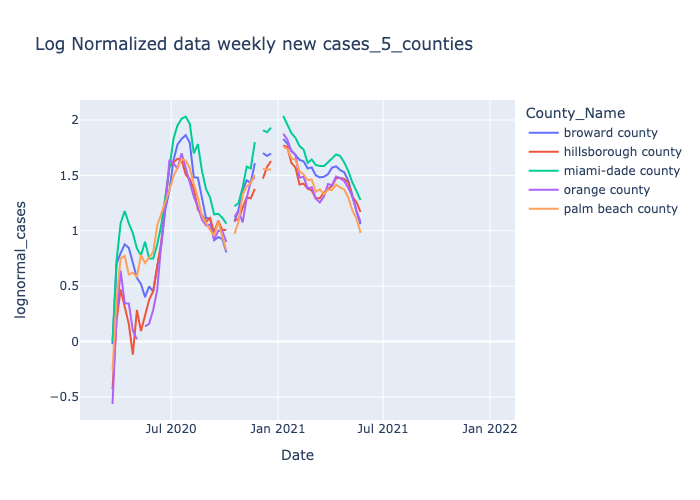

In [389]:
#Plot grap for number of new cases for normalized data across counties 

fig = px.line(fl_state_rates_subset, x="Date", y="lognormal_cases", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Log Normalized data weekly new cases_5_counties')
#display plot
fig.write_image("graphs/normalized weekly log normalized data new_cases_5_Counties.png")
Image(filename="graphs/normalized weekly log normalized data new_cases_5_Counties.png")
#fig.show()

## Plot graph to get weekly trends of death cases with Log Normalized data (per 100,000 person)

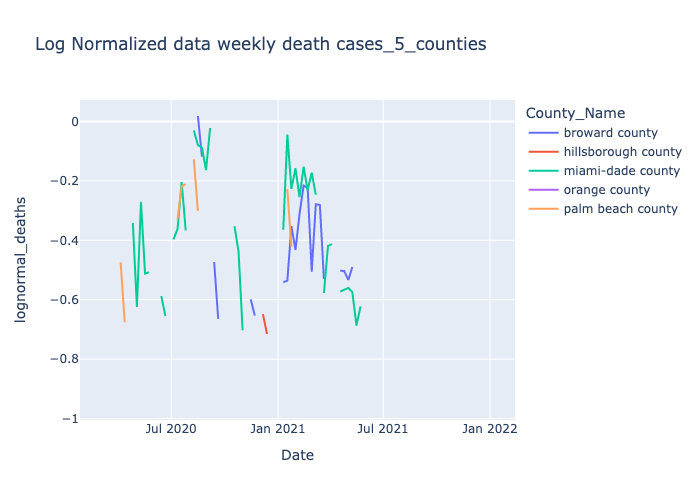

In [390]:
#Plot grap for number of death cases for normalized data across counties 

fig = px.line(fl_state_rates_subset, x="Date", y="lognormal_deaths", color="County_Name",
              line_group="County_Name", hover_name="County_Name", title ='Log Normalized data weekly death cases_5_counties')
#display plot
fig.write_image("graphs/normalized weekly log normalized data death_cases_5_Counties.png")
Image(filename="graphs/normalized weekly log normalized data death_cases_5_Counties.png")
#fig.show()

## Describe what is causing change in trends and do the counties follow the state pattern.

* The highest peak of confirmed cases in counties of Florida follow state pattern which have peaks in January 2021 and then October 2021 and finally January 2022.
* The counties in Florida are showing very less death rate in January 2022 as compared to other states.
* All the counties in Florida are showing same pattern with spikes in deaths in October 2020. 
* The raw data and normalized data show same trends for five counties in Florida.